In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as  plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [16]:
!pip  install tensorflow

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1

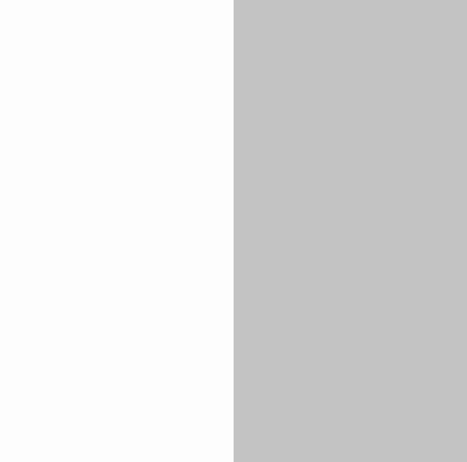

In [2]:
im= Image.open("black_gray.PNG",'r')
im

In [3]:
pix_val=np.array(im.getdata())

In [11]:
kernal=[[1,0,-1],
        [1,0,-1],
        [1,0,-1]]

In [20]:
pix_val*kernal


ValueError: operands could not be broadcast together with shapes (215754,4) (3,3) 

In [18]:
pix_val=pix_val.reshape(467*462,4)

In [10]:
pix_val[1000]

array([253, 253, 253, 255])

In [4]:
pix_val[100000]

array([253, 253, 253, 255])

In [5]:
pix_val.shape

(215754, 4)

In [7]:
pix_val.ndim

2

In [8]:
im.size

(467, 462)

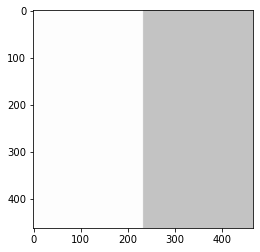

In [19]:
plt.subplot()
plt.imshow(im,cmap=plt.get_cmap('gray'))

In [18]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 185s 1us/step


In [22]:
x_train.shape

(50000, 32, 32, 3)

In [23]:
x_test.shape

(10000, 32, 32, 3)

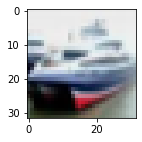

In [82]:
plt.figure(figsize=(15,2))
plt.imshow(x_test[1])

In [30]:
y_train[0]

array([6], dtype=uint8)

In [84]:
y_train=y_train.reshape(-1,)
y_train.ndim

1

In [77]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

TypeError: only integer scalar arrays can be converted to a scalar index

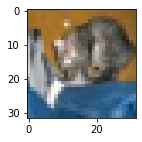

In [85]:
 plot_sample(x_test,y_test,0)

In [47]:
x_train_nor=x_train/255
x_test_nor=x_test/255

In [48]:
x_train_nor[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [49]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid"),
    
])
ann.compile(optimizer='SGD',
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

ann.fit(x_train_nor,y_train,epochs=5)
    


Epoch 1/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.8108 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.6256 - accuracy: 0.4242
Epoch 3/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5432 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4812 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4344 - accuracy: 0.4964


In [53]:
ann.get_weights()


[array([[ 0.02847277, -0.0135213 , -0.02442463, ..., -0.03354316,
          0.02993292, -0.02751218],
        [-0.02659233, -0.00288065, -0.00485082, ..., -0.00718197,
          0.01493725,  0.01716794],
        [ 0.01164517,  0.01136405,  0.01341243, ...,  0.0203947 ,
         -0.00827371,  0.02883133],
        ...,
        [-0.01258152, -0.00156575,  0.02233693, ..., -0.02756969,
          0.00147161, -0.00987826],
        [-0.0053994 ,  0.0042086 ,  0.01179114, ...,  0.03004782,
         -0.00902699,  0.01949236],
        [-0.00615023, -0.01501393,  0.0319679 , ...,  0.01320573,
         -0.00099764,  0.00432539]], dtype=float32),
 array([ 7.7026511e-05,  5.4285896e-04, -1.7309017e-02, ...,
        -8.5858665e-03,  3.9697222e-02,  1.6274998e-03], dtype=float32),
 array([[-0.00331277, -0.032076  ,  0.03104443, ..., -0.02999141,
         -0.02695192, -0.00085894],
        [ 0.00931849,  0.01322911, -0.02064822, ...,  0.01373424,
          0.02645859,  0.03094093],
        [ 0.02903458

In [54]:
ann.evaluate(x_test_nor,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.4605 - accuracy: 0.4833


[1.4604601860046387, 0.48330000042915344]

In [60]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),#filters give how many features you catch
    #kernel means size of one freature 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),#We havenot need to give the shape of the input layer.It automatically identify that
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax"),
    
])

In [61]:
cnn.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

cnn.fit(x_train_nor,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4819 - accuracy: 0.4695
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1219 - accuracy: 0.6076
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9918 - accuracy: 0.6563
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9065 - accuracy: 0.6832
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8400 - accuracy: 0.7079
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7852 - accuracy: 0.7268
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7332 - accuracy: 0.7468
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6909 - accuracy: 0.7590
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6491 - accuracy: 0.7744
Epoch 10/10
1563/1563 [==============================] - 31s 20m

In [66]:
k=cnn.predict(x_test_nor)

313/313 [==============================] - 2s 5ms/step


In [68]:
k.shape[0]

10000

In [81]:
for i in range(0,1000):
    print(np.where(k[i]==k[i].max()))

(array([3], dtype=int64),)
(array([8], dtype=int64),)
(array([1], dtype=int64),)
(array([8], dtype=int64),)
(array([2], dtype=int64),)
(array([6], dtype=int64),)
(array([1], dtype=int64),)
(array([6], dtype=int64),)
(array([3], dtype=int64),)
(array([1], dtype=int64),)
(array([0], dtype=int64),)
(array([9], dtype=int64),)
(array([5], dtype=int64),)
(array([7], dtype=int64),)
(array([9], dtype=int64),)
(array([8], dtype=int64),)
(array([5], dtype=int64),)
(array([4], dtype=int64),)
(array([8], dtype=int64),)
(array([6], dtype=int64),)
(array([7], dtype=int64),)
(array([0], dtype=int64),)
(array([0], dtype=int64),)
(array([9], dtype=int64),)
(array([4], dtype=int64),)
(array([2], dtype=int64),)
(array([4], dtype=int64),)
(array([0], dtype=int64),)
(array([9], dtype=int64),)
(array([6], dtype=int64),)
(array([3], dtype=int64),)
(array([5], dtype=int64),)
(array([4], dtype=int64),)
(array([5], dtype=int64),)
(array([9], dtype=int64),)
(array([3], dtype=int64),)
(array([7], dtype=int64),)
(

In [80]:
np.where(k==k[0].max())

(array([0], dtype=int64), array([3], dtype=int64))

In [75]:
k[0]

array([5.7500869e-04, 1.3949804e-03, 3.3700948e-03, 7.5695533e-01,
       5.5372209e-05, 6.2712006e-02, 1.6513230e-01, 8.2086317e-06,
       9.3012750e-03, 4.9536285e-04], dtype=float32)

In [83]:
cnn.evaluate(x_test_nor,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9685 - accuracy: 0.6841


[0.96846604347229, 0.6840999722480774]